#1. Data Preprocessing





*  **Load the dataset**



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/datasets_house_prices.csv')



*   **Missing values**



In [24]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64




*  **Normalizing the features**



In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
y = data['Price']

#2. Model Implementation




In [26]:
def linear_regression(X, y):
    X = np.c_[np.ones(len(X)), X]  # Add bias term
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y  # Calculate model parameters
    return theta[0], theta[1:]

def predict(X, theta0, theta):
    return theta0 + X @ theta  # Predict house prices

#3. Model Training



*   **Splitting the Dataset**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



*   **Training linear regression model**


In [28]:
theta0, theta = linear_regression(X_train, y_train)

*  **Calculating the Mean Squared Error (MSE)**

In [29]:
y_train_pred = predict(X_train, theta0, theta)
mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f'Training MSE: {mse_train:.2f}')

Training MSE: 170277648.52


#4. Model Evaluation



*   **Testing the Model**



In [30]:
y_test_pred = predict(X_test, theta0, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'Testing MSE: {mse_test:.2f}')

Testing MSE: 167882080.37


*   **Visualizing the Result**



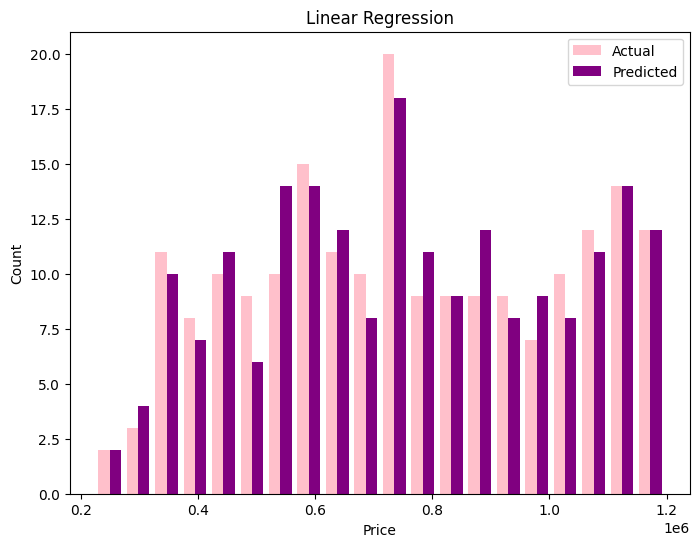

In [31]:
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['pink', 'purple'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.legend()
plt.show()

#5. Report


In this project, we used linear regression to predict house prices based on features like size, number of bedrooms, and age.

- During **data preprocessing**, I checked for missing values, but none were found. Then, I normalized the features using a standard scaler to ensure all inputs were on the same scale, which is important for improving the model's performance.

- For **model implementation**, I wrote a custom linear regression function that added a bias term and used matrix operations to find the model parameters (theta values).

- During **training**, I split the dataset into training and testing sets. I trained the model using the training set and calculated the mean squared error (MSE) to measure how well the model fit the data. The training MSE was 170,277,648.52.

- In **evaluation**, I tested the model on the unseen test data, where the testing MSE was slightly lower at 167,882,080.37, indicating a fairly consistent performance between training and testing.

- Finally, the **conclusion** is that the model performed reasonably well, though the high MSE suggests that it could be improved, perhaps by including more features or using more advanced algorithms.

The **challenge** I encountered was ensuring proper scaling of features, which I addressed by using standardization. Visualization of the results further helped compare actual and predicted values, showing that the predictions followed the general trend but had some variation.